NAME:AJITHRA P
    
ROLL NO:215229102

In [60]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Reading the csv file

In [61]:
import pandas as pd

In [62]:
train=pd.read_csv('train.csv')

In [63]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [64]:
test=pd.read_csv('test.csv')
test

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [65]:
train['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

# APPLY PREPROCESSING TECHNIQUES

# Filling Missing Values:

In [66]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [67]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

In [68]:
train['location'] = train['location'].fillna('None')
train['keyword'] = train['keyword'].fillna('None')
test['location'] = test['location'].fillna('None')
test['keyword'] = test['keyword'].fillna('None')

# Extract Contractions

In [69]:
pip install contractions

In [70]:
import re
import contractions

# Lowercase

In [71]:
train['text'] = train['text'].str.lower()

In [72]:
train['text']

0       our deeds are the reason of this #earthquake m...
1                  forest fire near la ronge sask. canada
2       all residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       just got sent this photo from ruby #alaska as ...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @thetawniest the out of control w...
7610    m1.94 [01:04 utc]?5km s of volcano hawaii. htt...
7611    police investigating after an e-bike collided ...
7612    the latest: more homes razed by northern calif...
Name: text, Length: 7613, dtype: object

# Remove Punctuation

In [73]:
import string

In [74]:
train['text'] = train['text'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '' , x))

In [75]:
train['text']

0       our deeds are the reason of this earthquake ma...
1                   forest fire near la ronge sask canada
2       all residents asked to shelter in place are be...
3       13000 people receive wildfires evacuation orde...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    ariaahrary thetawniest the out of control wild...
7610    m194 0104 utc5km s of volcano hawaii httptcozd...
7611    police investigating after an ebike collided w...
7612    the latest more homes razed by northern califo...
Name: text, Length: 7613, dtype: object

# Remove words and digits containing digits

In [76]:
train['text'] = train['text'].apply(lambda x: re.sub('W*dw*','',x))

In [77]:
train['text']

0       our ees are the reason of this earthquake may ...
1                    forest fire near la ronge sask canaa
2       all resients aske to shelter in place are bein...
3       13000 people receive wilfires evacuation orers...
4       just got sent this photo from ruby alaska as s...
                              ...                        
7608    two giant cranes holing a brige collapse into ...
7609    ariaahrary thetawniest the out of control wil ...
7610    m194 0104 utc5km s of volcano hawaii httptcozt...
7611    police investigating after an ebike collie wit...
7612    the latest more homes raze by northern califor...
Name: text, Length: 7613, dtype: object

# Remove Stopwords

In [78]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [79]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words.add('subject')
stop_words.add('http')
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])
train['text'] = train['text'].apply(lambda x: remove_stopwords(x))

In [80]:
train['text']

0              ees reason earthquake may allah forgive us
1                    forest fire near la ronge sask canaa
2       resients aske shelter place notifie officers e...
3       13000 people receive wilfires evacuation orers...
4       got sent photo ruby alaska smoke wilfires pour...
                              ...                        
7608    two giant cranes holing brige collapse nearby ...
7609    ariaahrary thetawniest control wil fires calif...
7610      m194 0104 utc5km volcano hawaii httptcoztoy8ebj
7611    police investigating ebike collie car little p...
7612    latest homes raze northern california wilfire ...
Name: text, Length: 7613, dtype: object

# Rephrase text

In [81]:
import re

string = '''Love, Kenneth, kenneth+challenge@teamtreehouse.com, 555-555-5555, @kennethlove
Chalkley, Andrew, andrew@teamtreehouse.co.uk, 555-555-5556, @chalkers
McFarland, Dave, dave.mcfarland@teamtreehouse.com, 555-555-5557, @davemcfarland
Kesten, Joy, joy@teamtreehouse.com, 555-555-5558, @joykesten'''

contacts = re.search(r'''
    (?P<email>[-\w\d.+]+@[-\w\d.]+),\s+
    (?P<phone>\d{3}-\d{3}-\d{4})
''', string, re.X|re.M)

In [82]:
contacts

<re.Match object; span=(15, 64), match='kenneth+challenge@teamtreehouse.com, 555-555-5555>

# Tokenization

In [83]:
import nltk
from nltk import TweetTokenizer

tokenizer = TweetTokenizer()

train['tokens'] = [tokenizer.tokenize(item) for item in train.text]
test['tokens'] = [tokenizer.tokenize(item) for item in test.text]

# Stemming

In [84]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])
train["text"] = train["text"].apply(lambda x: stem_words(x))

# Lemmatization

In [85]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [86]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])
train["text"] = train["text"].apply(lambda text: lemmatize_words(text))

# Vectorization

In [87]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()


X = vectorizer.fit_transform(train.text).toarray()
y = train['target']

# Splitting the trainset

In [88]:
import numpy as np
from sklearn.model_selection import train_test_split

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [90]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [91]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [127]:
y_train

4996    1
3263    0
4907    1
2855    1
4716    0
       ..
5226    0
5390    0
860     0
7603    1
7270    1
Name: target, Length: 6090, dtype: int64

In [128]:
y_test

2644    1
2227    0
5448    1
132     0
6845    0
       ..
1835    0
506     1
3592    1
6740    1
1634    0
Name: target, Length: 1523, dtype: int64

# Modelling

In [129]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()

In [130]:
lor_fit=log.fit(X_train,y_train)
lor_predict=log.predict(X_test)

In [131]:
y_predict=log.predict(X_test)
y_predict

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# Accuracy Score

In [132]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics

In [133]:
lor_ascores=accuracy_score(y_test,y_predict)
lor_ascores

0.7898883782009193

# Confusion matrix

<AxesSubplot:>

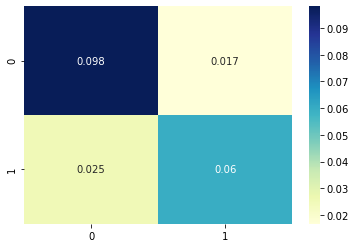

In [134]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_predict) / len(y), cmap='YlGnBu', annot=True)

In [135]:
# Classification Report
clf_report = classification_report(y_test,y_predict)
print("\nCLASSIFICATION REPORT:\n", clf_report)


CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       874
           1       0.78      0.70      0.74       649

    accuracy                           0.79      1523
   macro avg       0.79      0.78      0.78      1523
weighted avg       0.79      0.79      0.79      1523

